# Computer Network: Network Simulation using NS2
> __Morteza Nouri, 810198481__ <br>
> __Seyed Mohammad Amin Atyabi, 810198559__

## Goals
- Creating network topology and simulating it with NS2
- Getting familiar with different layers of network (e.g, UDP, TCP, etc.)
- Getting familiar with wireless networks especially 802.11 (WiFi)
- Measuring performance metrics of networks
- Impact of Error rate on Throughput, Packet Transfer Ratio and End-to-End delay

## Description:
> __Network Topology:__<br>
- Nodes 0 and 3 are senders, we apply UDP agent to them with Maximum Segment Size (MSS) of 2048 bytes.
- Nodes 7 and 8 are receivers, we apply UDP/Null agent to them, so they free packet when they received.
- We set CBR on node 0 and 3. (CBR is an application traffic generator).
- Nodes send 20 packet/s with given packet size.
- Current wireless network uses RTS/CTS/ACK handshakes to transmit data.
- RTS/CTS (Request To Send / Clear To Send) is the optional mechanism used by the 802.11 wireless networking protocol to reduce frame collisions introduced by the hidden node problem. The information recoreded as MAC type in trace file.
- We use AODV routing protocol. It only consists of information about its neighbor nodes so re-transferring the data frames might take more time.
- You can find well commented tcl code for this simulation in WLan.tcl which gives additional information about this topology.

> 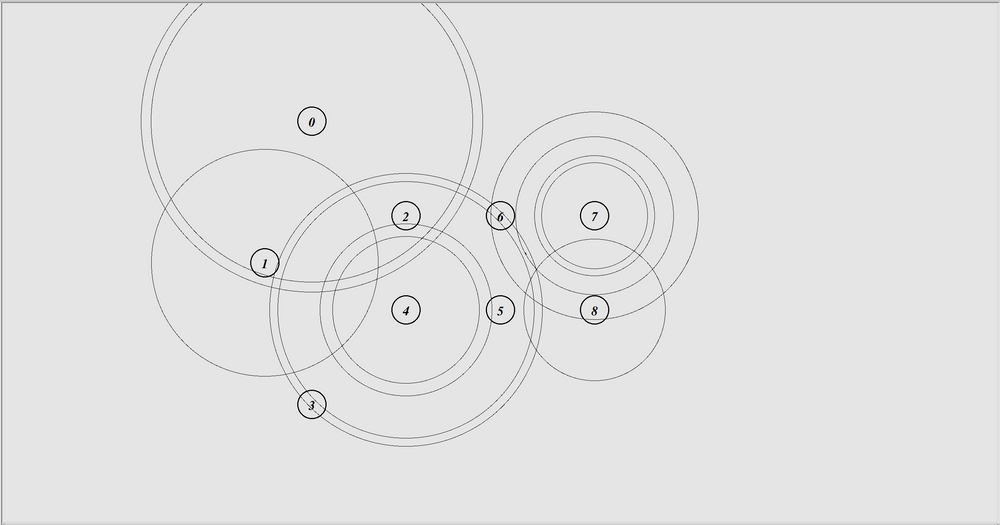

> - Useful links:
    [RTS/CTS diagram](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.researchgate.net%2Ffigure%2FRtS-CtS-handshake-with-active-CSMA-CA-mechanism_fig2_280786256&psig=AOvVaw25dcMW4WYcOKPA0w0_hU7Z&ust=1651248008528000&source=images&cd=vfe&ved=0CAwQjRxqFwoTCNjJwqyQt_cCFQAAAAAdAAAAABAJ), 
> [Wireless Simulation](http://intronetworks.cs.luc.edu/current/html/ns2.html#wireless-simulation)

## Results:

In [5]:
import os
import random
import matplotlib.pyplot as plt
from Analyzer import Analyzer

TCL = 'WLan.tcl'

### Scenario 1:
- in this section we generate 10 different error rates between 0.000001 and 0.00001 and detect impact of that on other performance metrics

In [ ]:
# Default args
BANDWIDTH = '1Mb'
PACKETSIZE = '1024'

# Scenario 1: give 10 different error rates between 0.000001 and 0.00001 and detect impact on performance parameters
err_rates = []
for i in range(10):
    err_rates.append(random.uniform(0.00001, 0.000001))
    
err_rates.sort()
throughput = []
transfer_ratio = []
avg_delay = []
for err_rate in err_rates:
    prog = TCL + ' ' + BANDWIDTH + ' ' + PACKETSIZE + ' ' + str(err_rate)
    command = 'ns' + ' ' + prog
    os.system(command)
    analyzer = Analyzer('traces/' + BANDWIDTH + '-' + PACKETSIZE + '-' + str(err_rate) + '.tr')
    analyzer.parse()
    throughput.append(analyzer.throughput())
    transfer_ratio.append(analyzer.packet_transfer_ratio())
    avg_delay.append(analyzer.avg_end_to_end_delay())

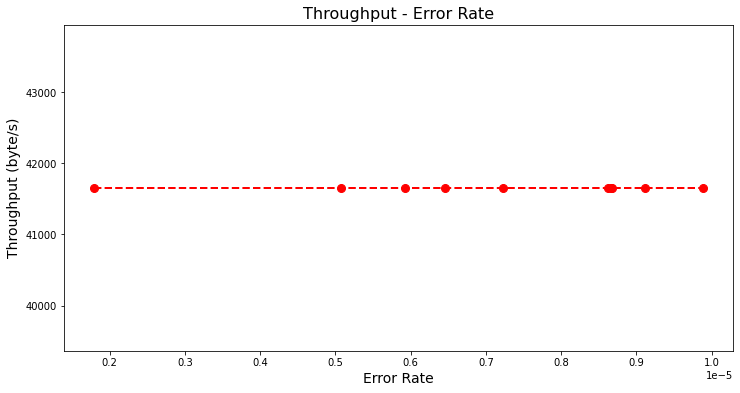

In [7]:
plt.rcParams["figure.figsize"] = (12, 6) 

plt.plot(err_rates, throughput, color='red', linestyle='dashed', linewidth=2, marker='o', markerfacecolor='red', markersize=8)
plt.xlabel('Error Rate', fontsize=14)
plt.ylabel('Throughput (byte/s)', fontsize=14)
plt.title('Throughput - Error Rate', fontsize=16)
plt.savefig("Throughput-ErrorRate")

__Inference:__ _Because the error rate is very small, count of received packets don't changed, thus Throughput doesn't change, But generally if error rate grow up, Throughput and transfer rate grow down. in our simulation if we change the error rate to 0.01 we can see that!_

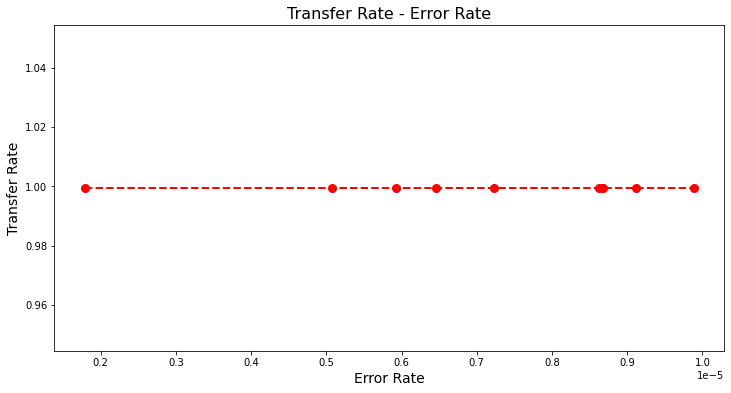

In [8]:
plt.plot(err_rates, transfer_ratio, color='red', linestyle='dashed',
         linewidth=2, marker='o', markerfacecolor='red', markersize=8)
plt.xlabel('Error Rate', fontsize=14)
plt.ylabel('Transfer Rate', fontsize=14)
plt.title('Transfer Rate - Error Rate', fontsize=16)
plt.savefig("TransferRate-ErrorRate")

__Inference:__ _Same as previous inference._

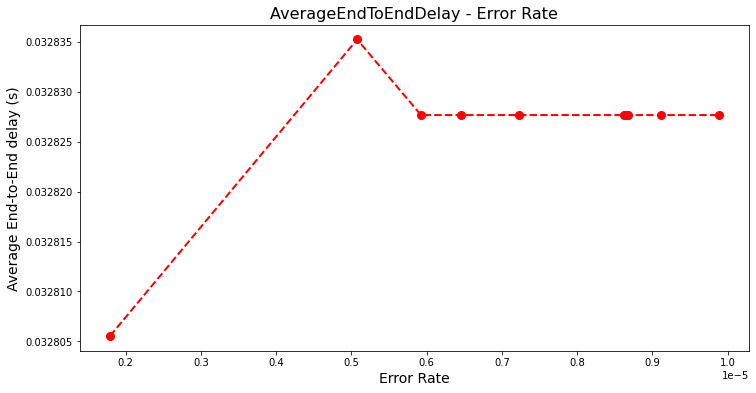

In [9]:
plt.plot(err_rates, avg_delay, color='red', linestyle='dashed',
         linewidth=2, marker='o', markerfacecolor='red', markersize=8)
plt.xlabel('Error Rate', fontsize=14)
plt.ylabel('Average End-to-End delay (s)', fontsize=14)
plt.title('AverageEndToEndDelay - Error Rate', fontsize=16)
plt.savefig("AverageEndToEndDelay-ErrorRate")

__Inference:__ _By increasing error rate, it takes time to 802.11 to detect and correct some errors(retransmit or correct in destination), thus end-to-end delay increases._

### Scenario 2:
- In this section, we train our network for different packet sizes. (assuming other parameters are fixed)

In [ ]:
# Default args
BANDWIDTH = '1Mb'
ERROR_RATE = '0.00001'
    
packet_sizes = [128, 256, 512, 1024, 1500, 1800,  2048, 4096]
throughput = []
transfer_ratio = []
avg_delay = []
for psize in packet_sizes:
    prog = TCL + ' ' + BANDWIDTH + ' ' + str(psize) + ' ' + ERROR_RATE
    command = 'ns' + ' ' + prog
    os.system(command)
    analyzer = Analyzer('traces/' + BANDWIDTH + '-' + str(psize) + '-' + ERROR_RATE + '.tr')
    analyzer.parse()
    throughput.append(analyzer.throughput())
    transfer_ratio.append(analyzer.packet_transfer_ratio())
    avg_delay.append(analyzer.avg_end_to_end_delay())

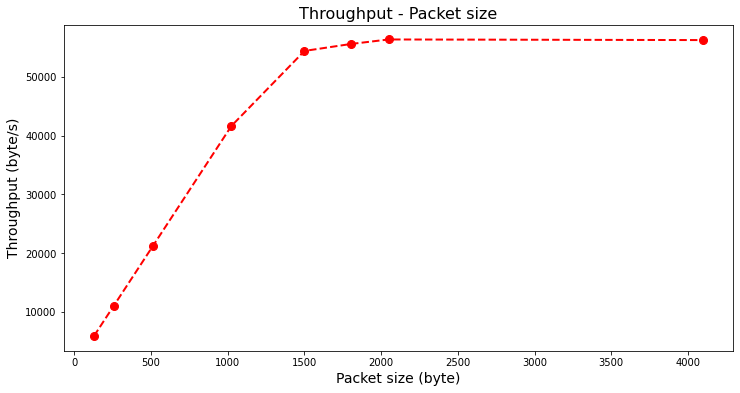

In [11]:
plt.plot(packet_sizes, throughput, color='red', linestyle='dashed', linewidth=2, marker='o', markerfacecolor='red', markersize=8)
plt.xlabel('Packet size (byte)', fontsize=14)
plt.ylabel('Throughput (byte/s)', fontsize=14)
plt.title('Throughput - Packet size', fontsize=16)
plt.savefig("Throughput-Packet size")

__Inference:__ _A UDP agent accepts data in variable size chunks from an application, and segments the data if needed.The default maximum segment size (MSS) for UDP agents is 1000 byte but we change this value to 2048 bytes. So when packet size becomes larger than MSS, the throughput doesn't increase anymore, even decreases a little. beacause count of sending packets increases, thus network get congested and packet loss increases. We can observe the influence on transfer ratio in below figure._


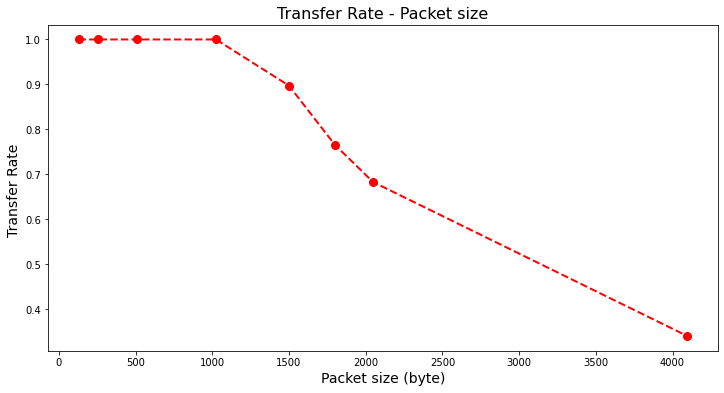

In [12]:
plt.plot(packet_sizes, transfer_ratio, color='red', linestyle='dashed', linewidth=2, marker='o', markerfacecolor='red', markersize=8)
plt.xlabel('Packet size (byte)', fontsize=14)
plt.ylabel('Transfer Rate ', fontsize=14)
plt.title('Transfer Rate - Packet size', fontsize=16)
plt.savefig("Transfer Rate-Packet size")

__Inference:__ _As packet size increases, it is a challenge for UDP to transfer data (because of segmentation and network congestion), So number of received packets decrease and transfer rate decreases accordingly._

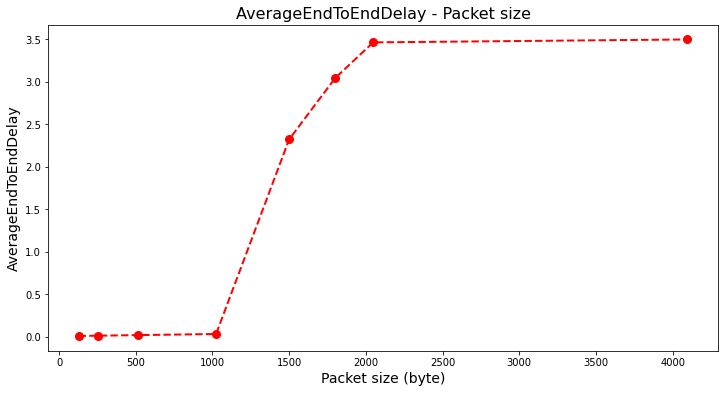

In [13]:
plt.plot(packet_sizes, avg_delay, color='red', linestyle='dashed', linewidth=2, marker='o', markerfacecolor='red', markersize=8)
plt.xlabel('Packet size (byte)', fontsize=14)
plt.ylabel('AverageEndToEndDelay', fontsize=14)
plt.title('AverageEndToEndDelay - Packet size', fontsize=16)
plt.savefig("AverageEndToEndDelay-Packet size")

__Inference:__ _As packet size increases(with fixed data rate), it takes longer time to transmit data._

### Scenario 3:
- In this section, We train our network for 3 different bandwidthes : 1.5Mb, 55Mb and 155Mb

In [ ]:
# Default args
PACKETSIZE = '2048'
ERROR_RATE = '0.00001'

    
bandwidthes = [1.5, 55, 155]
throughput = []
transfer_ratio = []
avg_delay = []
for bw in bandwidthes:
    prog = TCL + ' ' + str(bw) + 'Mb' + ' ' + PACKETSIZE + ' ' + ERROR_RATE
    command = 'ns' + ' ' + prog
    os.system(command)
    analyzer = Analyzer('traces/' +str(bw) + 'Mb' + '-' + PACKETSIZE + '-' + ERROR_RATE + '.tr')
    analyzer.parse()
    throughput.append(analyzer.throughput())
    transfer_ratio.append(analyzer.packet_transfer_ratio())
    avg_delay.append(analyzer.avg_end_to_end_delay())

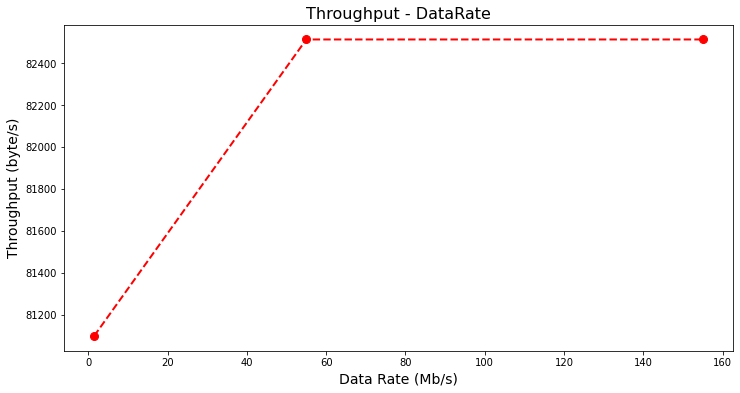

In [17]:
plt.plot(bandwidthes, throughput, color='red', linestyle='dashed', linewidth=2, marker='o', markerfacecolor='red', markersize=8)
plt.xlabel('Data Rate (Mb/s)', fontsize=14)
plt.ylabel('Throughput (byte/s)', fontsize=14)
plt.title('Throughput - DataRate', fontsize=16)
plt.savefig("Throughput-DataRate")

__Important Note:__ Note that wireless networks use electromagnetic waves and air for transmitting data rather than coax cable or similar, So the speed of transmitting data (dataRate) used instead of bandwidth.<br>
__Inference:__ _As the data rate growth, the throughput increases(we can send packets fast, so we can send more packets in a period of time), but according to our packet size, the throughput is equal for 55Mb and 155Mb, the result is 55Mb is a sufficient data rate for us(incoming packet rate to UDP node is less than data rate).To differentiate between throughput of 55Mb and 155Mb, we can increase packet size as much greater than MSS or increasing packet rates of CBR.

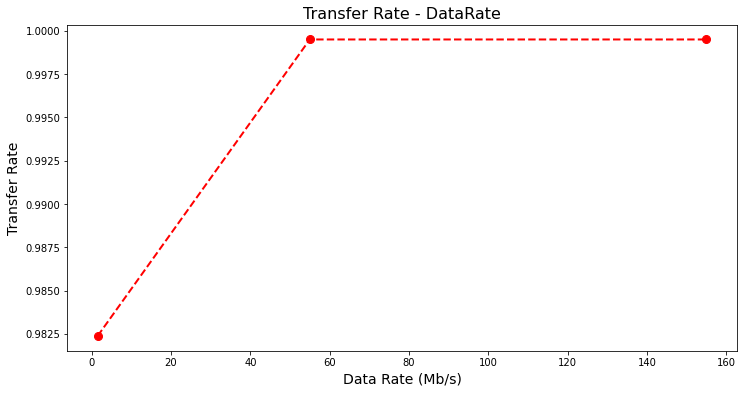

In [19]:
plt.plot(bandwidthes, transfer_ratio, color='red', linestyle='dashed', linewidth=2, marker='o', markerfacecolor='red', markersize=8)
plt.xlabel('Data Rate (Mb/s)', fontsize=14)
plt.ylabel('Transfer Rate', fontsize=14)
plt.title('Transfer Rate - DataRate', fontsize=16)
plt.savefig("TransferRate-DataRate")

__Inference:__ _As data rate increases, we can send more packets to destination nodes. The reason for equality of transfer rate for 55Mb and 155Mb mentioned in previous inference._

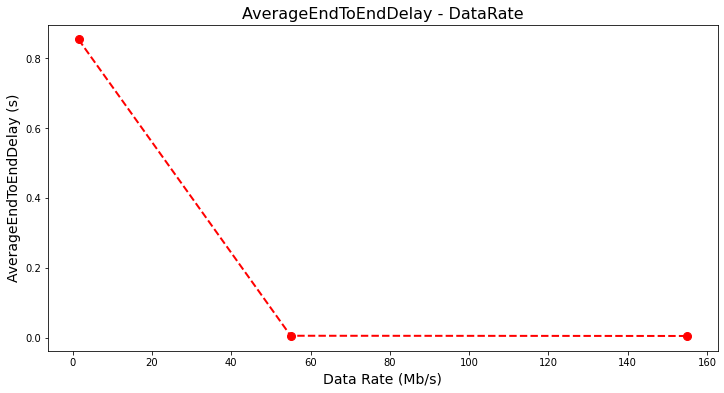

In [20]:
plt.plot(bandwidthes, avg_delay, color='red', linestyle='dashed', linewidth=2, marker='o', markerfacecolor='red', markersize=8)
plt.xlabel('Data Rate (Mb/s)', fontsize=14)
plt.ylabel('AverageEndToEndDelay (s)', fontsize=14)
plt.title('AverageEndToEndDelay - DataRate', fontsize=16)
plt.savefig("AverageEndToEndDelay-DataRate")

__Inference:__ _This is obvious, faster transmission results in less delay._